In [1]:
import sys
import numpy
import pandas
s_cryspy_future_dir = r"D:\documents\working_comp\python\cryspy_future"
sys.path.insert(1, s_cryspy_future_dir)
import cryspy_future as cryspy

In [11]:
obj1 = cryspy.Cell(length_a=10, length_b=10., length_c=10,
                  angle_alpha=90., angle_beta=90., angle_gamma=90.)
obj2 = cryspy.Cell(length_a=3., length_b=4., length_c=3.5,
                  angle_alpha=90., angle_beta=90., angle_gamma=90.)
obj = cryspy.CellL(loop_name="fff")
obj.items = [obj1, obj2]

In [12]:
obj

loop_fff
_cell_length_a
_cell_length_b
_cell_length_c
_cell_angle_alpha
_cell_angle_beta
_cell_angle_gamma
10.00000   10.00000   10.00000   90.00   90.00   90.00  
3.00000    4.00000    3.50000    90.00   90.00   90.00

In [15]:
obj1.calc_m_t(numpy.array([2], dtype=int), numpy.array([0], dtype=int), numpy.array([0], dtype=int))

(array([6.123234e-17]),
 array([-6.123234e-17]),
 array([1.]),
 array([1.]),
 array([3.74939946e-33]),
 array([-6.123234e-17]),
 array([0.]),
 array([1.]),
 array([6.123234e-17]))

In [32]:
vol

,length_a,length_b
0,4.0,5.000000+0.000000j
1,3.0,2.000000+0.000000j


In [17]:
ddata = {"length_a": numpy.array([4,3], dtype=float), "length_b": numpy.array([5,2], dtype=complex)}
pandas_data = pandas.DataFrame(ddata)

In [19]:
pandas_data.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>length_a</th>\n      <th>length_b</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>4.0</td>\n      <td>5.000000+0.000000j</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>3.0</td>\n      <td>2.000000+0.000000j</td>\n    </tr>\n  </tbody>\n</table>'

In [20]:
%%HTML
<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>
<th>length_a</th>
<th>length_b</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>4.0</td>
<td>5.000000+0.000000j</td>
</tr>
<tr>
<th>1</th>
<td>3.0</td>
<td>2.000000+0.000000j</td>
</tr>
</tbody>
</table>

,length_a,length_b
0,4.0,5.000000+0.000000j
1,3.0,2.000000+0.000000j


In [11]:
x = numpy.array([('Rex', 9, 81.0), ('Fido', 3, 27.0)],
             dtype=[('name', 'U10'), ('age', 'i4'), ('weight', 'f4')])

In [22]:
vv = pandas.DataFrame(x, index=["A", "B"])

In [42]:
vv

,name,age,weight
A,Rex,9,81.0
B,Fido,3,27.0


In [43]:
name_2 = numpy.array(["iu", "JOIJ"], dtype=str)

In [44]:
vv.name  = name_2

In [45]:
vv

,name,age,weight
A,iu,9,81.0
B,JOIJ,3,27.0


In [59]:
vv.name["A"] = numpy.nan

C:\Users\litar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
type(vv.name.B)

str

In [57]:
x["name"][0] = "New name of STD"

In [58]:
x

array([('New name o', 9, 81.), ('Fido', 3, 27.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [16]:
"""
expression for eqution out of the plane
"""

import sympy

sympy.init_printing()

phi, alpha, H, p = sympy.symbols("phi alpha H p")
th_11, th_12, th_13 = sympy.symbols("theta_11 theta_12 theta_13")
th_21, th_22, th_23 = sympy.symbols("theta_21 theta_22 theta_23")
th_31, th_32, th_33 = sympy.symbols("theta_31 theta_32 theta_33")


THETA = sympy.Matrix([[th_11, th_12, th_13], [th_21, th_22, th_23], [th_31, th_32, th_33]])

z = H * sympy.cos(alpha)
r_xy = H * sympy.sin(alpha)

H_loc_new = sympy.Matrix([r_xy*sympy.cos(phi), r_xy*sympy.sin(phi), z]) 
P_loc_new = sympy.Matrix([r_xy*sympy.cos(phi)*p/H, r_xy*sympy.sin(phi)*p/H, z*p/H])


M_loc_new = THETA*H_loc_new

M_loc_new_perp_k = sympy.Matrix([M_loc_new[0], M_loc_new[1], 0])

M_loc_new_perp_k_sq = (M_loc_new_perp_k.T * M_loc_new_perp_k)

M_loc_new_perp_k_sq_aver = sympy.integrate(M_loc_new_perp_k_sq/(2*sympy.pi),(phi,0,2*sympy.pi))

M_loc_new_perp_k_sq_aver_simple = sympy.simplify(M_loc_new_perp_k_sq_aver)

#in equatorial plane
M_loc_new_perp_k_sq_aver_simple.subs(alpha, sympy.pi/2)

#general expression
M_loc_new_perp_k_sq_aver_simple


MP_perp_aver = sympy.integrate(M_loc_new_perp_k.T*P_loc_new/(2*sympy.pi), (phi, 0, 2*sympy.pi))

#general expression
MP_perp_aver_simple = sympy.simplify(MP_perp_aver)






chi_11, chi_12, chi_13 = sympy.symbols("chi_11 chi_12 chi_13")
chi_22, chi_23 = sympy.symbols("chi_22 chi_23")
chi_33 = sympy.symbols("chi_33")
chi_21, chi_31, chi_32 = chi_12, chi_13, chi_23

CHI = sympy.Matrix([[chi_11, chi_12, chi_13], [chi_21, chi_22, chi_23], [chi_31, chi_32, chi_33]])

al_e, be_e, g_e = sympy.symbols("alpha_E beta_E gamma_E")

t_11 = sympy.cos(al_e)*sympy.cos(g_e)-sympy.sin(al_e)*sympy.cos(be_e)*sympy.sin(g_e)
t_12 = -sympy.cos(al_e)*sympy.sin(g_e)-sympy.sin(al_e)*sympy.cos(be_e)*sympy.cos(g_e)
t_13 = sympy.sin(al_e)*sympy.sin(be_e)

t_21 = sympy.sin(al_e)*sympy.cos(g_e)-sympy.cos(al_e)*sympy.cos(be_e)*sympy.sin(g_e)
t_22 = -sympy.sin(al_e)*sympy.sin(g_e)+sympy.cos(al_e)*sympy.cos(be_e)*sympy.cos(g_e)
t_23 = -sympy.cos(al_e)*sympy.sin(be_e)

t_31 = sympy.sin(be_e)*sympy.sin(g_e)
t_32 = sympy.sin(be_e)*sympy.cos(g_e)
t_33 = sympy.cos(be_e)

T = sympy.Matrix([[t_11, t_12, t_13],
                  [t_21, t_22, t_23],
                  [t_31, t_32, t_33]])

SIGMA = T.T*CHI*T
SIGMA_simple = sympy.simplify(SIGMA.subs(g_e, 0))

SIGMA_11 = sympy.simplify(SIGMA_simple[0,0])
SIGMA_12 = sympy.simplify(SIGMA_simple[0,1])
SIGMA_13 = sympy.simplify(SIGMA_simple[0,2])

SIGMA_21 = sympy.simplify(SIGMA_simple[1,0])
SIGMA_22 = sympy.simplify(SIGMA_simple[1,1])
SIGMA_23 = sympy.simplify(SIGMA_simple[1,2])

SIGMA_31 = sympy.simplify(SIGMA_simple[2,0])
SIGMA_32 = sympy.simplify(SIGMA_simple[2,1])
SIGMA_33 = sympy.simplify(SIGMA_simple[2,2])


check_12 = sympy.simplify(SIGMA_12 - SIGMA_21) 
check_13 = sympy.simplify(SIGMA_13 - SIGMA_31) 
check_23 = sympy.simplify(SIGMA_23 - SIGMA_32)



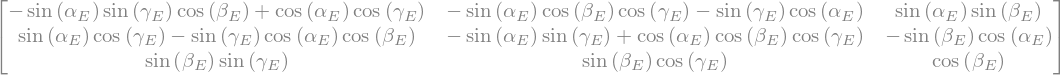

In [17]:
T

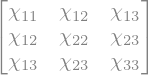

In [18]:
CHI

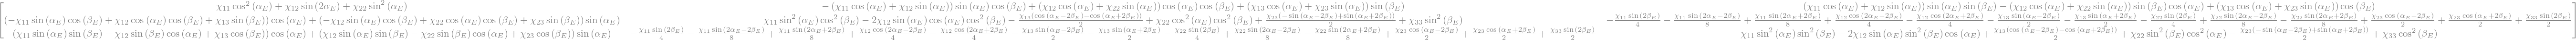

In [21]:
SIGMA_simple